In [10]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from skimage.filters import sobel
from skimage.segmentation import watershed
import tensorflow as tf
from keras.preprocessing import image
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding,Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
import re
import pandas as pd

In [42]:
nltk.download('stopwords')
oov_tok = '<oov>'
embedding_dims = 16
padding_type = 'post'
vocab_size = 1000
max_length = 20
trunc_type = 'post'
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\risha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Sentiment model


In [11]:
df = pd.read_csv("sentiment_analysis_dataset.csv")

#preprocessing (making lowercase,removing stopwords,onehot_encoding,padding to make uniform length,mappig catigorical data)
corpus = []
sentances = df.line.copy()
for sent in sentances:
    review = re.sub('[^a-zA-Z]', ' ', sent).lower().split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
onehot_representation = [one_hot(sent,vocab_size) for sent in corpus]
padded_sequences = pad_sequences(onehot_representation,padding=padding_type,maxlen=max_length)
line = np.array(padded_sequences)
df["sentiment"] = df["sentiment"].map({"Angry": 0,"Happy":1,"Neutral":2})
labels = np.array(df['sentiment'])

In [12]:
#Embedding model

embedding_dim=16
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dims,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])

c:\Users\risha\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [13]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
history=model.fit(padded_sequences,labels,epochs=40)

Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2667 - loss: 1.1004
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4000 - loss: 1.0982
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4667 - loss: 1.0965
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5333 - loss: 1.0949
Epoch 5/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5667 - loss: 1.0932
Epoch 6/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5667 - loss: 1.0914
Epoch 7/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6000 - loss: 1.0898
Epoch 8/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7333 - loss: 1.0881
Epoch 9/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8000 - loss: 1.0864
Epoch 10/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8333 - loss: 1.0847
Epoch 11/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8667 - loss: 1.0830
Epoch 12/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9333 - loss: 1.0813
Epo

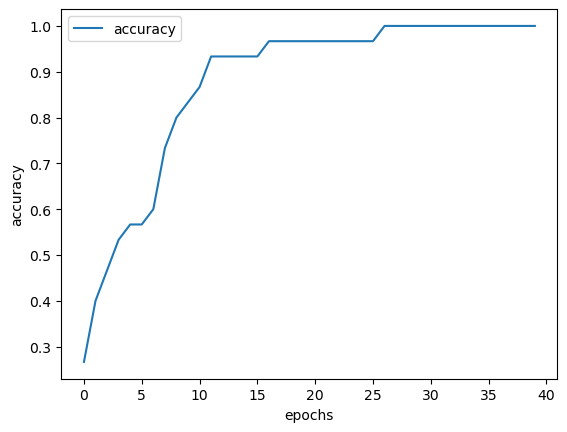

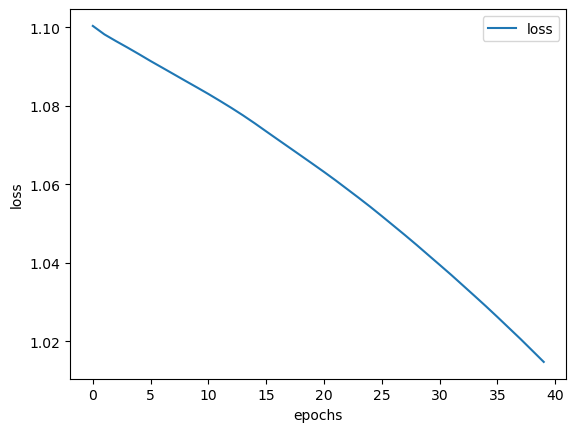

In [15]:
def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.xlabel('epochs')
    plt.ylabel(string)
    plt.legend([string,'val_'+string])
    plt.show()


plot_graphs(history,'accuracy')
plot_graphs(history,'loss')

### Now that we have trained our sentiment model we can make functions for extracting and reading the text from the imgs

# Functions for extracting text

### reading img data and preproccessing(grey scale,guassianBlur,thresholding,normalizing)

In [27]:
def read_img(path):

    img = cv2.imread(path)
    img = image.img_to_array(img, dtype='uint8')
    copy = img.copy()
    print(img.shape)
    grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(grey,(5,5),0)
    _,thresh = cv2.threshold(blur,127,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    elevation_map = sobel(thresh)
    markers = np.zeros_like(thresh)
    markers[thresh < 30] = 1
    markers[thresh > 150] = 2
    segment = watershed(elevation_map,markers)
    th3 = cv2.normalize(src = segment,dst= None,alpha = 0 , beta = 255,norm_type= cv2.NORM_MINMAX,dtype=cv2.CV_8U)

    return img,th3

### segmentaion of proccessed img using histogram projection method

In [28]:
def segmentation(th3):

    #taking sum of number of white pixels along y axis
    horizontal_hist = np.sum(th3,axis=1,keepdims=True)/255
    hor = horizontal_hist

    #dividing into lines
    lines = []
    pix = 0
    start = 0
    for i in range(len(hor)):
        val = hor[i][0]
        if val !=0.0:
            if pix == 0:
                start = i
            pix += 1
        if val == 0.0 and pix != 0:
            lines.append(th3[start-2: start + pix+2,0:280])
            start = 0
            pix = 0
    
    #sum along x axis
    vertical = np.sum(lines[0],axis=0,keepdims=True)/255

    #dividing lines into letters with space
    letter_list = []
    for l in range(len(lines)):
        current_line = []
        line = lines[l]
        vertical = np.sum(line,axis=0,keepdims=True)/255
        vert = vertical[0]
        m = line.shape[0]
        zeros = 0
        for i in range(len(vert)):
            val = vert[i]
            if val == 0:
                zeros +=1
            if val !=0.0:
                if pix == 0:
                    start = i
                    if zeros > 30:
                        current_line.append("sp")
                        zeros = 0
                pix += 1
            if val == 0.0 and pix != 0:
                im = line[0:m,start-2:start+pix+2]
                im = cv2.resize(im,(28,28))
                current_line.append(im)
                zeros = 0
                start = 0
                pix = 0
        if zeros > 30:
            current_line.append("sp")
        letter_list.append(current_line)
    
    return letter_list

### Using char recognition model to convert into text
##### *CNN model layers and training in task2_char_recognition*

In [29]:
def convert_to_text(letters):
    text = ""
    
    model_char = tf.keras.models.load_model("Predict_letter.keras")

    for i in range(len(letters)):
        for j in range(len(letters[i])):
            if letters[i][j] == "sp":
                text = text + " "
            else:
                z = letters[i][j]
                lst = [z,]
                l_a = np.array(lst)
                ch = np.argmax(model_char.predict(l_a,verbose = 0)) + 65
                text = text + chr(ch) 
    return text

# Function for predicting extracted text

In [36]:
tokenizer = Tokenizer()
def predict_sentiment(model, tokenizer, new_reviews, max_length=max_length, show_padded_sequence=True):

    #sentiment prediction using model with line preproccesing    
    corpus=[]
    for sent in new_reviews:
        review = re.sub('[^a-zA-Z]', ' ', sent).lower().split()
        review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
        review = ' '.join(review)
        corpus.append(review)
    onehot_representation = [one_hot(sent,vocab_size) for sent in corpus]
    padded_sequences = pad_sequences(onehot_representation,padding=padding_type,maxlen=max_length)
    
    #predicting and giving output
    pred = model.predict(padded_sequences,verbose=0)
    if np.argmax(pred) == 0:
        print("PREDICTED SENTIMENT: ANGRY")
    if np.argmax(pred) == 1:
        print("PREDICTED SENTIMENT: HAPPY")
    if np.argmax(pred) == 2:
        print("PREDICTED SENTIMENT: NEUTRAL")

## Final ocr and sentiment analysis function

In [44]:
def ocr_and_sentiment(path):
    orignal,proccesed = read_img(path)
    letter_list = segmentation(proccesed)
    para = convert_to_text(letter_list)
    plt.imshow(orignal)
    plt.show()
    print("line extracted after OCR:")
    print(para)
    predict_sentiment(model, tokenizer, [para,])
    print('--------------------------------------------------------------------------------')

### Looping through all target files

(336, 280, 3)


C:\Users\risha\AppData\Local\Temp\ipykernel_28380\1218400808.py:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if letters[i][j] == "sp":


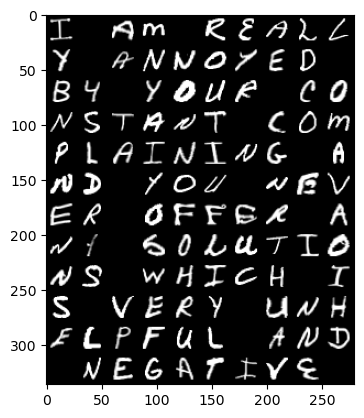

line extracted after OCR:
I AM REALCX ANNOYED BY YOUE CONSTANT COMPLAINING AMD YOU NEVER OFFGR ANZT SORUTIONS WMICH IS VERY UNHECPEUL AND NEGHTIVE 
PREDICTED SENTIMENT: ANGRY
--------------------------------------------------------------------------------
(364, 280, 3)


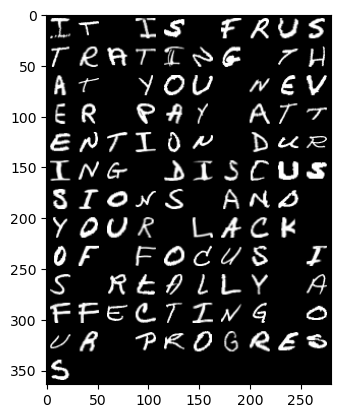

line extracted after OCR:
IT IS ERUSTRATENG THAT YOU NEVER PAT ATTENTION DURING DISEUSSIONS ANO YOUR LACR OE FOCUS IS XEOELY AFEECTZNG OUR ZROGREOS 
PREDICTED SENTIMENT: ANGRY
--------------------------------------------------------------------------------
(336, 280, 3)


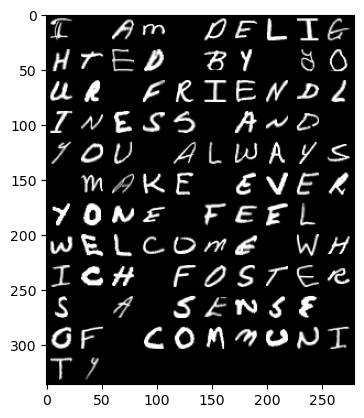

line extracted after OCR:
E AM DELIGHTEO BX HOUR ERIENDRTNESS ANO YOU ALWAYS MAKE EVERXONE EEEL WELCOME WHICH FOSTERS A SKNSE OF COMMUNITY 
PREDICTED SENTIMENT: HAPPY
--------------------------------------------------------------------------------
(336, 280, 3)


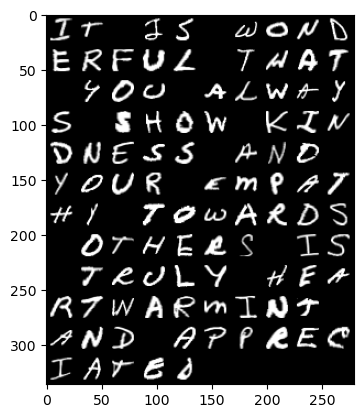

line extracted after OCR:
ZT JS WONDEREUR TNAT SOC ALWAYS SHOW KINDNESS ANO YOUR EMPATHP TOWARDS OTHERS IS TRULY HEARZWARMINT AND ABPRECIATCS 
PREDICTED SENTIMENT: HAPPY
--------------------------------------------------------------------------------
(336, 280, 3)


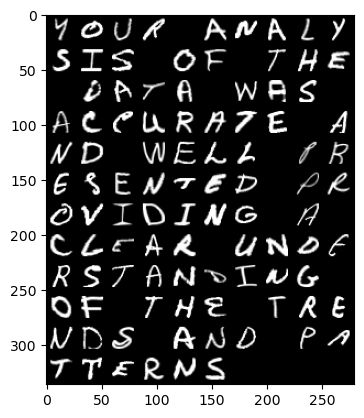

line extracted after OCR:
YOUR ANARYSIS OF THE NATA WAS MCCURAZE AND WEKL ERESENTED EECROVIDING A CCEHR UNOERSTANUING OF THE TREUDS AND RATTERNS 
PREDICTED SENTIMENT: HAPPY
--------------------------------------------------------------------------------
(364, 280, 3)


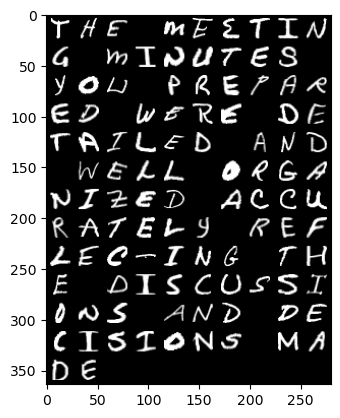

line extracted after OCR:
THE MEETINC MINUTES YOU PREPARED WERE DETALLED AND WERL ORGANIZED QCZURATEEY REERECZZNG THE DISCUSSLZTONS AND DECISIONS MADE 
PREDICTED SENTIMENT: HAPPY
--------------------------------------------------------------------------------


In [45]:
for i in range(1,7):
    ocr_and_sentiment(f"target_images/line_{i}.png")
